## Importing Libraries

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
policy_df = pd.read_csv('.data/train_Df64byy.csv')
print(policy_df.shape)
policy_df.head()

(50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


Number of customers showed interest  12209 , ( 23.99473291144216 %)
Number of customers that did not show interest  38673 , ( 76.00526708855784 %)


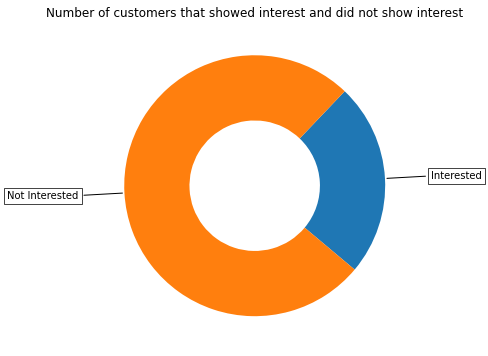

In [4]:
y_value_counts = policy_df['Response'].value_counts()
print("Number of customers showed interest ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of customers that did not show interest ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Interested", "Not Interested"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of customers that showed interest and did not show interest")

plt.show()

This shows that majority of the customers in the dataset did not show interest in buying FinMan's Health Insurance policy and there is a class imbalance of the ratio 1:3 approximately  

## Missing Values

In [5]:
policy_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

The missing values in the Holding Policy Duration and Holding Policy type indicates the customer has not taken any previous Insurance policies/loan/investment from the company. The missing values in the health indicator might be because the customers have not disclosed the information.

## Univariate Analysis: Categorical variables

In [6]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Response', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Customers')
    plt.title('% of customers interested ' + xtick + ' wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'interested'))
    plt.show()

In [7]:
def univariate_barplots(data, col1, col2='Response', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))


 City_Code

Categories: ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31'] 
No of Categories 36


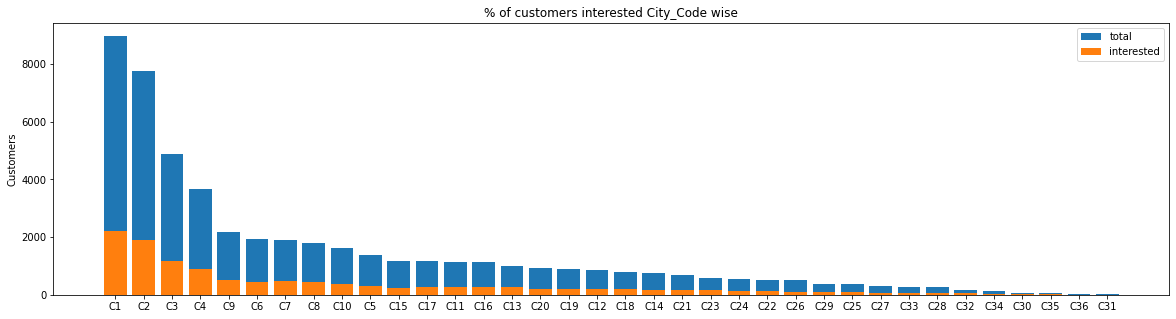

   City_Code  Response  total       Avg
0         C1      2208   8973  0.246072
11        C2      1893   7747  0.244353
22        C3      1161   4889  0.237472
30        C4       889   3671  0.242168
35        C9       510   2185  0.233410
   City_Code  Response  total       Avg
27       C34        36    130  0.276923
23       C30        18     58  0.310345
28       C35        16     56  0.285714
29       C36         5     36  0.138889
24       C31         2     15  0.133333

----------------------------------------------------------------------------------------------------


 Accomodation_Type

Categories: ['Rented' 'Owned'] 
No of Categories 2


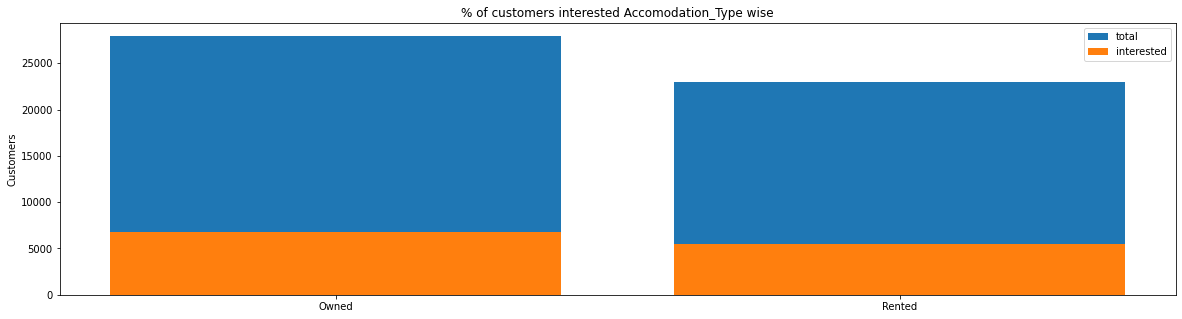

  Accomodation_Type  Response  total       Avg
0             Owned      6763  27951  0.241959
1            Rented      5446  22931  0.237495
  Accomodation_Type  Response  total       Avg
0             Owned      6763  27951  0.241959
1            Rented      5446  22931  0.237495

----------------------------------------------------------------------------------------------------


 Reco_Insurance_Type

Categories: ['Individual' 'Joint'] 
No of Categories 2


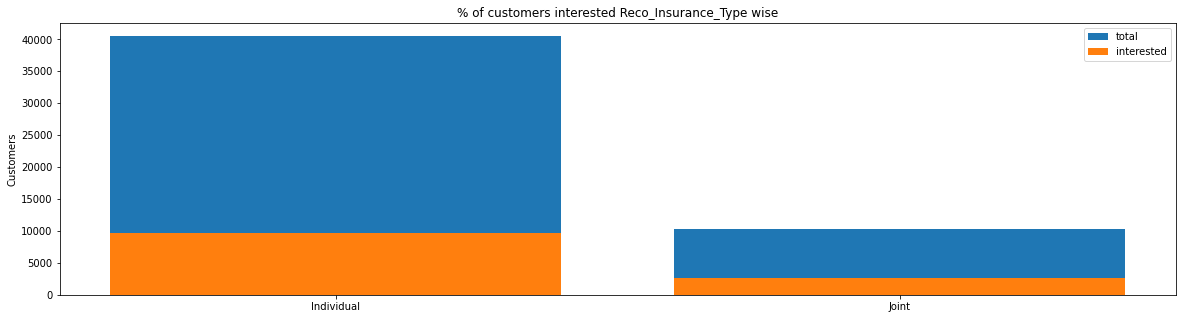

  Reco_Insurance_Type  Response  total       Avg
0          Individual      9640  40536  0.237813
1               Joint      2569  10346  0.248309
  Reco_Insurance_Type  Response  total       Avg
0          Individual      9640  40536  0.237813
1               Joint      2569  10346  0.248309

----------------------------------------------------------------------------------------------------


 Is_Spouse

Categories: ['No' 'Yes'] 
No of Categories 2


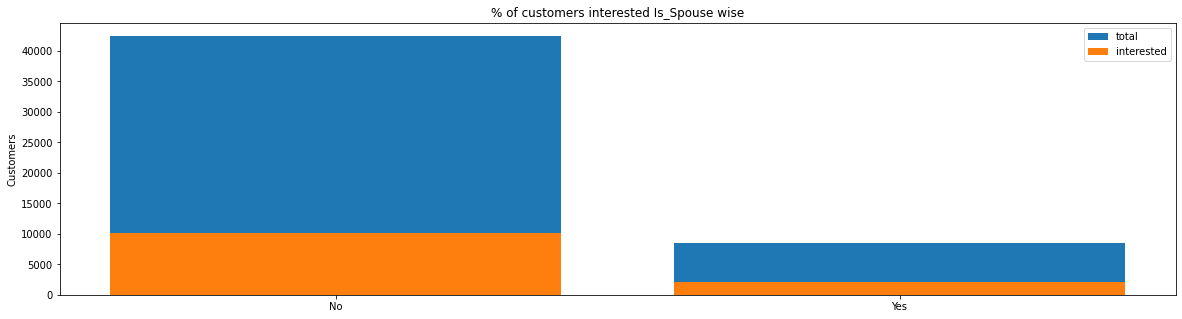

  Is_Spouse  Response  total       Avg
0        No     10157  42460  0.239213
1       Yes      2052   8422  0.243648
  Is_Spouse  Response  total       Avg
0        No     10157  42460  0.239213
1       Yes      2052   8422  0.243648

----------------------------------------------------------------------------------------------------


 Health Indicator

Categories: ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9'] 
No of Categories 10


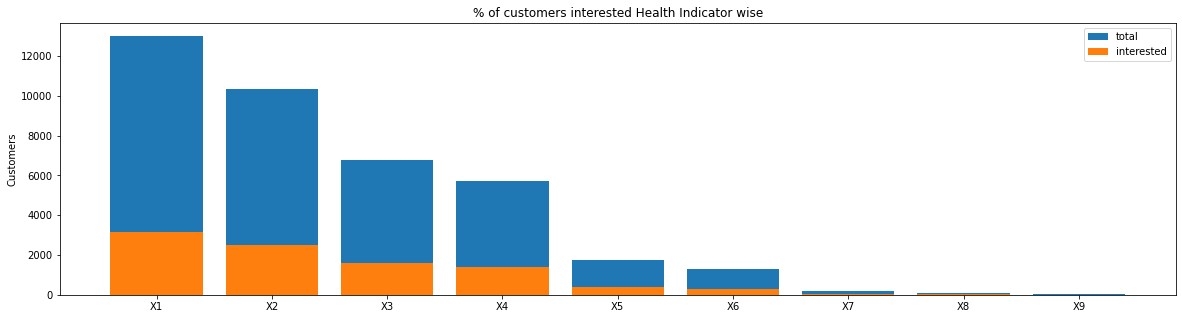

  Health Indicator  Response  total       Avg
0               X1      3176  13010  0.244120
1               X2      2491  10332  0.241096
2               X3      1599   6762  0.236469
3               X4      1396   5743  0.243079
4               X5       408   1727  0.236248
  Health Indicator  Response  total       Avg
4               X5       408   1727  0.236248
5               X6       307   1280  0.239844
6               X7        62    196  0.316327
7               X8        18     78  0.230769
8               X9        14     63  0.222222

----------------------------------------------------------------------------------------------------


 Holding_Policy_Type

Categories: [ 3. nan  1.  4.  2.] 
No of Categories 5


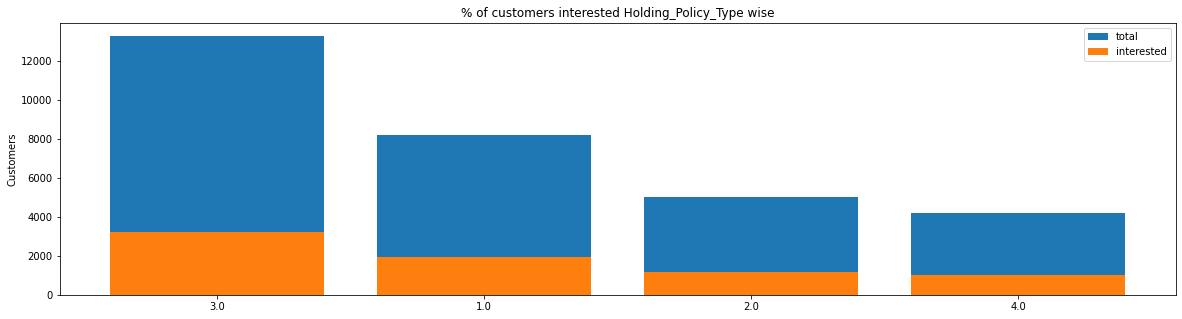

   Holding_Policy_Type  Response  total       Avg
2                  3.0      3217  13279  0.242262
0                  1.0      1927   8173  0.235776
1                  2.0      1190   5005  0.237762
3                  4.0      1036   4174  0.248203
   Holding_Policy_Type  Response  total       Avg
2                  3.0      3217  13279  0.242262
0                  1.0      1927   8173  0.235776
1                  2.0      1190   5005  0.237762
3                  4.0      1036   4174  0.248203

----------------------------------------------------------------------------------------------------


 Reco_Policy_Cat

Categories: [22 19 16 17  1 18 21 13 20  9  2  4 12  6 14 11  3  8  7 10 15  5] 
No of Categories 22


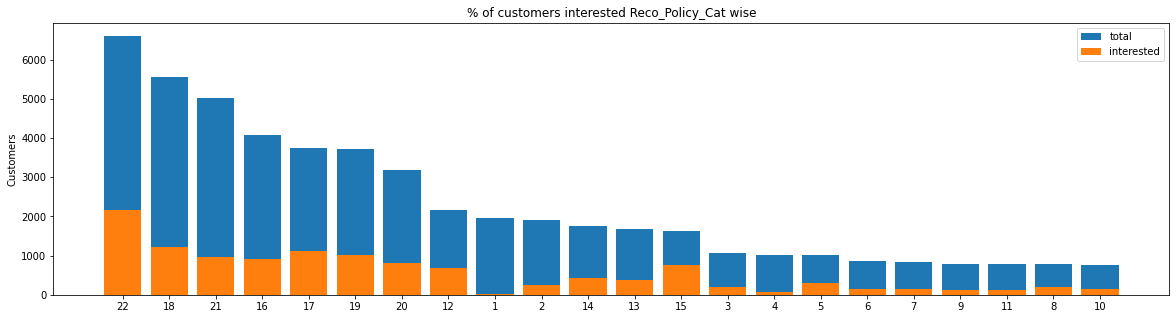

    Reco_Policy_Cat  Response  total       Avg
21               22      2168   6602  0.328385
17               18      1225   5553  0.220601
20               21       974   5027  0.193754
15               16       913   4084  0.223555
16               17      1121   3756  0.298456
    Reco_Policy_Cat  Response  total       Avg
6                 7       155    834  0.185851
8                 9       131    789  0.166033
10               11       130    781  0.166453
7                 8       209    776  0.269330
9                10       136    770  0.176623

----------------------------------------------------------------------------------------------------



In [8]:
for i in range(1,len(policy_df.columns)):
    if policy_df.columns[i] in ('City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat','Health Indicator','Holding_Policy_Type'):
        print('\n',policy_df.columns[i])
        print('\nCategories:',policy_df[policy_df.columns[i]].unique(),'\nNo of Categories',len(policy_df[policy_df.columns[i]].unique()))
        univariate_barplots(policy_df, policy_df.columns[i], 'Response', False)
        print('\n----------------------------------------------------------------------------------------------------\n')

In [9]:
print('Region_Code\n',policy_df['Region_Code'].unique(),'\nNumber of Categories:',len(policy_df['Region_Code'].unique()))

Region_Code
 [3213 1117 3732 ... 5326 6149 5450] 
Number of Categories: 5316


## Univariate Analysis: Numerical features

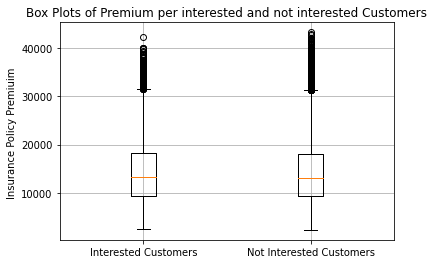

In [10]:
interested_premium = policy_df[policy_df['Response']==1]['Reco_Policy_Premium'].values

not_interested_premium = policy_df[policy_df['Response']==0]['Reco_Policy_Premium'].values

plt.boxplot([interested_premium, not_interested_premium])
plt.title('Box Plots of Premium per interested and not interested Customers')
plt.xticks([1,2],('Interested Customers','Not Interested Customers'))
plt.ylabel('Insurance Policy Premiuim ')
plt.grid()
plt.show()

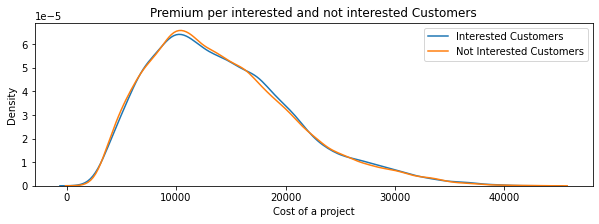

In [11]:
plt.figure(figsize=(10,3))
sns.distplot(interested_premium, hist=False, label='Interested Customers')
sns.distplot(not_interested_premium, hist=False, label='Not Interested Customers')
plt.title('Premium per interested and not interested Customers')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

### Points to Ponder
1. There are certain columns like 'City_Code' and 'Health Indicator' where it has very less data points from categories like 'C31','C36'(City_Code) and 8,10(Health Indicator')
2. For almost all the columns, Every category in a column has an similar ratio of negative:positive examples denoted by the average column in the table.
3. The distributions and box plots of insurance policy premium for both the interested and not interested customers are similar
4. Since the dataset is imbalanced, SMOTE technique can be used to synthetically generate data or class weights can be used to balance the weights of the model.